In [2]:
import numpy as np
import matplotlib.pylab as plt
from random import choice

In [3]:
#Линейная регрессия
def linreg(X, Y):
    X = np.array(X); Y = np.array(Y);   
    
    b = (sum(Y)* sum(X**2) - sum(X)*sum(X*Y)) / (X.shape[0] * sum(X**2) - sum(X)**2)
    k = (X.shape[0]*sum(X*Y) - sum(X)*sum(Y)) / (X.shape[0] * sum(X**2) - sum(X)**2)
    print('y = {}x + {}'.format(round(k, 3), round(b,3)))
    
    return k, b

In [11]:
neigh_matr = [(-1, 0), (-1, 1), (0, 1), (1, 1), (1, 0), (1, -1), (0, -1), (-1, -1), (-1, 0)]

def step(pos, prev_step):
    global neigh_matr
    neigh = []
    P = 2
    
    for i in neigh_matr:
        idx = neigh_matr.index(i)
        for j in range((prev_step[0]* i[0] + prev_step[1] * i[1])*P - (P - 1)):
            neigh.append((i[0]+pos[0], i[1] + pos[1]))
            
    next_s = choice(neigh)
    prev_step = [next_s[0] - pos[0], next_s[1] - pos[1]]
    return next_s, prev_step

/home/favgorn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in long_scalars
  """
/home/favgorn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in long_scalars
  


y = 0.029x + 114.019
y = 0.032x + 435.545
y = 0.036x + -165.223
y = 0.034x + -72.643
y = 0.035x + -95.73
y = 0.024x + -3.001
y = 0.033x + -138.557
y = 0.032x + 211.278
y = 0.027x + 60.708


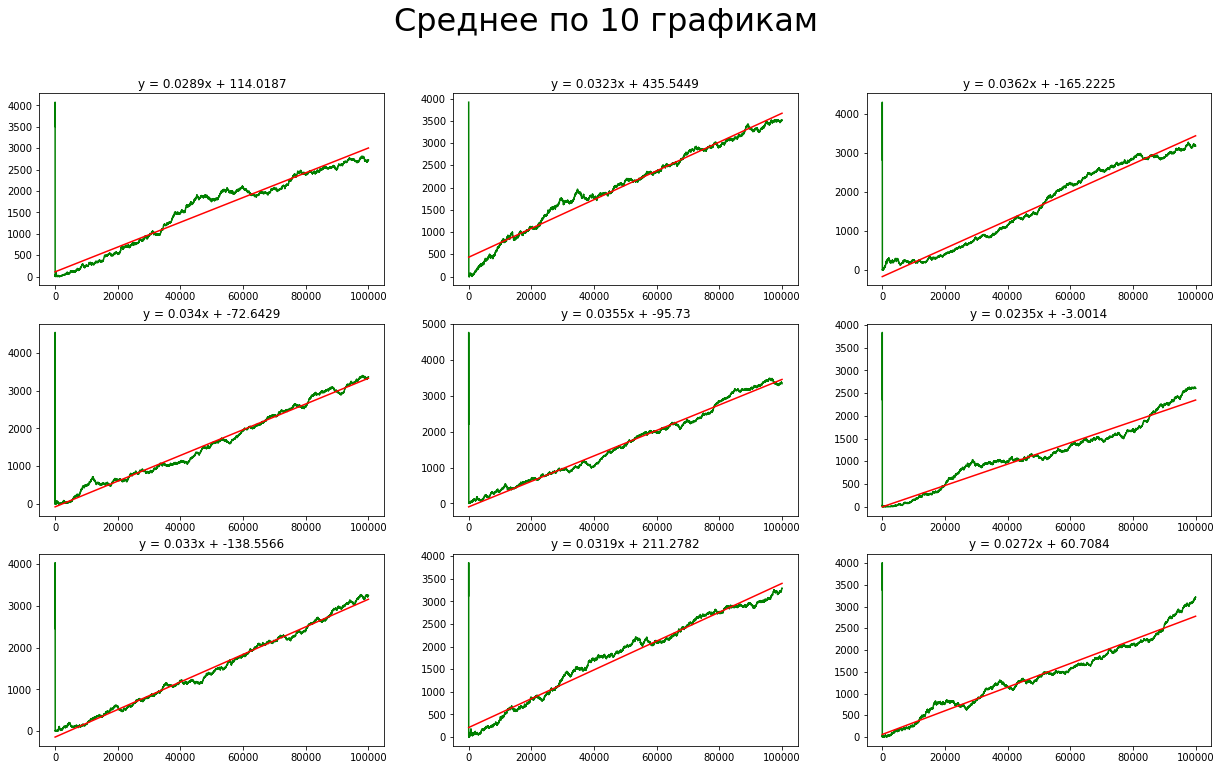

In [13]:
#Усреднение происходит по 10 эпохам
fig = plt.figure(figsize = (3*7, 3*4))
fig.suptitle('Среднее по 10 графикам', fontsize=32)

for tr in range(9):
    overall_history_val = []
    for i in range(10):
        init_pos = pos = (0, 0)
        prev_step = (1, 1)
        num_iter = int(100_000)
        prev_step = [1, 1]
        print('ep #{}; st #{}'.format(tr+1, i+1), end = '\r')

        for j in range(1, num_iter):
            pos, prev_step = step(pos, prev_step)
            
            if i == 0:
                overall_history_val.append(sum([x - y for x,y in zip(init_pos, pos)])**2/j)
            else:
                overall_history_val[i-1] =overall_history_val[i-1] *i/(i + 1) + (sum([x - y for x,y in zip(init_pos, pos)])**2/j)/(i + 1)

    k, b = linreg(range(1, num_iter), overall_history_val)
    
    sub = fig.add_subplot(3, 3, tr+1)
    plt.plot(range(1, num_iter), overall_history_val, 'g')
    plt.plot(range(1, num_iter), range(1, num_iter)*k + b, 'r')
    sub.title.set_text('y = {}x + {}'.format(round(k,4), round(b, 4)))
fig.show()
fig.savefig('Average_for_10_graphs')